# Figure 5  - Two types of exons involved in sex-biased exon skipping. 

- **(a)** log fold change expression vs. log fold change inclusion for all sex-biased events in mammary tissue. A higher fold change of female-to-male expression corresponds to a higher value on the X axis, and a higher fold change of female-to-male skipping-to-inclusion counts on the Y axis. Both fold changes are calculated by limma. Type I events showed a higher frequency of exon skipping in females and type II events showed a higher frequency of inclusion in females. Exon-skipping events are shown in blue instead of red if at least one RBP was significantly associated with the exon-skipping event. The brown lines represent a fit of the points by second-order polynomial regression. 

- **(b)** Comparison of the sum of acceptor and donor
splice scores for type I and type II exons (t-test). 

- **(c)** Comparison of the sum of exon lengths for type I and type II
exons (t-test).

## **NOTE**:

We assume that you have cloned the analysis repository and have `cd` into the parent directory. Before starting with the analysis make sure you have first completed the dependencies set up by following the instructions described in the **`dependencies/README.md`** document. All paths defined in this Notebook are relative to the parent directory (repository). Please close this Notebook and start again by following the above guidelines if you have not completed the aforementioned steps.

# Questions

- [ ] Where can we find this file? `/Users/karleg/Downloads/SplicingCalculatorData/hg38_ensembl_splicing_calculator_output.tsv`
- [ ] Has this file been generated by running a script and if so which one?
- [ ] `meta.data<-read.table('2017December8GTExRNASeqSRARunTable.txt',sep='\t',header=TRUE)` data?
- [ ] `read.table(paste('/Users/karleg/Dimorph/gene_expression/DE_result_',comp,'.txt',sep=''))`
- [ ] `as.tab<-read.table(paste('/Users/karleg/Dimorph/other/',paste(tissue.set,collapse='.'),event.type,'.txt',sep=''))`
- [ ] `event.ensembl.map<-read.table(paste('/Users/karleg/Dimorph/fromGTF.',toupper(event.type),'.txt',sep=''),header=T)`


## Loading dependencies

In [1]:
Sys.setenv(TAR = "/bin/tar") # for .gz files

# dataviz dependencies
library(ggplot2)
library(visdat)
library(patchwork)
library(ggsci)
library(grid)
library(report)
library(latex2exp)

ERROR: Error in library(latex2exp): there is no package called ‘latex2exp’


## 5a. Log-fold change expression vs. log fold change inclusion for all sex-biased events in mammary tissue.

code and `.Rdata` from: [../dimorphAS/figures/figure4c.R](https://github.com/TheJacksonLaboratory/sbas/blob/master/dimorphAS/figures/figure4/Daniels_ScoresHeartLV.R)

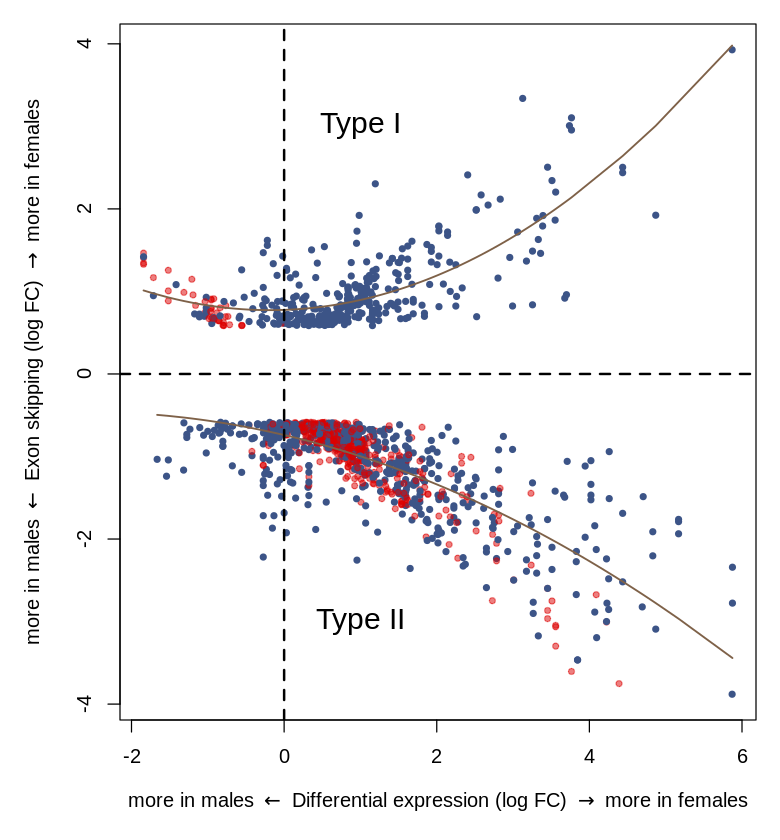

In [169]:
load("../dimorphAS/figures/figure4/figure4c.RData")
options(repr.plot.width=6.5, repr.plot.height=7)

npgBlue<- rgb(60/256,84/256,136/256,1)
npgRed <- rgb(220/256,0,0,0.5)
npgGreen <- rgb(0,160/256,135/256,1)
npgBrown <- rgb(126/256,97/256,72/256,1)

par(mar=c(5,5,1,1))

plot(x,y,
     main='',
     xlab=TeX("more in males $\\leftarrow$ Differential expression (log FC) $\\rightarrow$ more in females"),
     ylab=TeX("more in males $\\leftarrow$ Exon skipping (log FC) $\\rightarrow$ more in females"),
     cex.lab=1,
     cex.axis=1,
     col=ifelse(as.tab$Row.names[as.tab$Row.names %in% rownames(sig.events)] %in% rbp.regulated$V1,npgBlue,npgRed),
     pch=20)

y.upper<-y[y>0]
x.upper<-x[y>0]
y.lower<-y[y<0]
x.lower<-x[y<0]

fit.upper<-lm(y.upper ~ x.upper + I(x.upper^2))

lines(sort(x.upper), fitted(fit.upper)[order(x.upper)], col=npgBrown, type='l',lwd=1.5) 

fit.lower<-lm(y.lower ~ x.lower + I(x.lower^2))

lines(sort(x.lower), fitted(fit.lower)[order(x.lower)], col=npgBrown, type='l',lwd=1.5) 

abline(v=0,col="black",lty=2,lwd=2)
abline(h=0,col="black",lty=2,lwd=2)

text(1, 3,"Type I" ,cex=1.5)
text(1,-3,"Type II",cex=1.5)

## 5b. Comparison of the sum of acceptor and donor splice scores for type I and type II exons (t-test). 

code and `.Rdata` from: [../dimorphAS/figures/figure4/Daniels_ScoresHeartLV.R](https://github.com/TheJacksonLaboratory/sbas/blob/master/dimorphAS/figures/figure4/Daniels_ScoresHeartLV.R)

## Retrieving the required data

Warning message:
“Removed 606 rows containing non-finite values (stat_boxplot).”

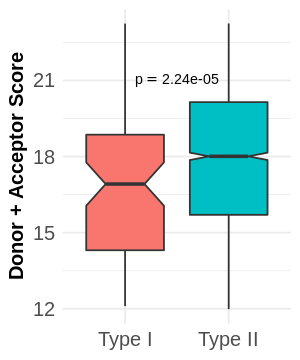

In [172]:
load('../dimorphAS/figures/figure4/daniels_scoresHeartLV.RData')
options(repr.plot.width=2.5, repr.plot.height=3)

npgBlue<- rgb(60/256,84/256,136/256,1)
npgRed <- rgb(220/256,0,0,0.5)
npgColors <- c(npgBlue,npgRed)

df$type <- as.factor(df$type)  # colors dont work with df$type being numbers

my.pval = t.test(scores.group.1,scores.group.2)$p.value

ggplot(df, aes(x=type, y=score,fill=type, group=type))  +
    
    geom_boxplot(notch=TRUE, 
                 outlier.shape=NA) + 

    theme_minimal()  + 
    scale_y_continuous(limits = quantile(df$score, c(0.1, 0.9))) + 
    guides(fill=FALSE) + theme(axis.text = element_text(size=0, hjust=0.5),
                               axis.ticks.x=element_blank(),
                               axis.title.x=element_blank(), 
                               axis.title.y = element_text(face="bold",  size=12),
                               axis.text.x = element_text(size=12),
                               axis.text.y = element_text(size=12),
                               legend.position="none")   +
    ylab('Donor + Acceptor Score') + 
    annotate("text", 
                    x=1.5, 
                    y=21, 
                    label=  paste0("p==", as.character(formatC(my.pval, 3))),
                    parse=TRUE, 
                    fontface="bold", 
                    size=3) -> pn1
pn1

## Get numbers


In [173]:
mean(df$score[df$type=="Type I"])
mean(df$score[df$type=="Type II"])
sum(df$type=="Type I")
sum(df$type=="Type II")

[1] 15.3875

[1] 17.76984

[1] 93

[1] 2933

In [174]:
e.lengths.group1<-as.tab1$exonEnd-as.tab1$exonStart_0base
e.lengths.group2<-as.tab2$exonEnd-as.tab2$exonStart_0base

mean(e.lengths.group1)
mean(e.lengths.group2)

[1] 150.6613

[1] 246.9785

In [175]:
wilcoxon.results <- stats::wilcox.test(e.lengths.group1,
                                       e.lengths.group2,
                                       paired = F)

wilcoxon.results


	Wilcoxon rank sum test with continuity correction

data:  e.lengths.group1 and e.lengths.group2
W = 130552, p-value = 0.1351
alternative hypothesis: true location shift is not equal to 0


## What does this dataframe do?

In [176]:
df<-data.frame(len=c(e.lengths.group1,e.lengths.group2),
               type=c(rep(1,length(e.lengths.group1)),
                      rep(2,length(e.lengths.group2))))

df$type <- ifelse (df$type==1, "Type II", "Type I") 
df$type <- as.factor(df$type) 

head(df)

,len,type
,<int>,<fct>
1,83,Type II
2,83,Type II
3,62,Type II
4,102,Type II
5,47,Type II
6,128,Type II


In [177]:
my.pval = wilcox.test(e.lengths.group1,e.lengths.group2,paired = F)$p.value
my.pval

[1] 0.1351046

Warning message in mean.default(df$score[df$type == "Type I"]):
“argument is not numeric or logical: returning NA”

[1] NA

Warning message in mean.default(df$score[df$type == "Type II"]):
“argument is not numeric or logical: returning NA”

[1] NA

[1] 93

[1] 3088

[1] 150.6613

[1] 246.9785

Warning message:
“Removed 610 rows containing non-finite values (stat_boxplot).”

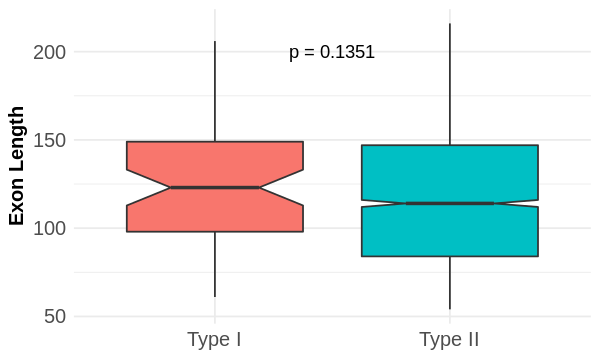

In [184]:
## get numbers
mean(df$score[df$type=="Type I"])
mean(df$score[df$type=="Type II"])
sum(df$type=="Type I")
sum(df$type=="Type II")
e.lengths.group1<-as.tab1$exonEnd-as.tab1$exonStart_0base
e.lengths.group2<-as.tab2$exonEnd-as.tab2$exonStart_0base
mean(e.lengths.group1)
mean(e.lengths.group2)

wilcoxon.results <- wilcox.test(e.lengths.group1,e.lengths.group2,paired = F)


df<-data.frame(len=c(e.lengths.group1,e.lengths.group2),type=c(rep(1,length(e.lengths.group1)),rep(2,length(e.lengths.group2))))
df$type <-  ifelse (df$type==1, "Type II", "Type I") 
df$type <- as.factor(df$type) 

ggplot(df, aes(x=type, 
               y=len,
               fill=type, 
               group=type))  +

            geom_boxplot(notch=TRUE, outlier.shape=NA) + theme_minimal()  +

            scale_y_continuous(limits = quantile(df$len, c(0.1, 0.9))) + guides(fill=FALSE) +

            theme(axis.text = element_text(size=0, hjust=0.5),axis.ticks.x=element_blank(),
                axis.title.x=element_blank(),
                axis.title.y = element_text(face="bold",  size=12),
                axis.text.x = element_text(size=12),
                axis.text.y = element_text(size=12),
                legend.position="none")   + 
            ylab('Exon Length') + 
            annotate("text", 
                     x=1.5, 
                     y=200, 
                     label= as.character(paste0("p = ", formatC(wilcoxon.results$p.value)),
                                         parse=TRUE, 
                                         fontface="bold", 
                                         size=3)) -> pn2
pn2

Warning message:
“Removed 606 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 610 rows containing non-finite values (stat_boxplot).”

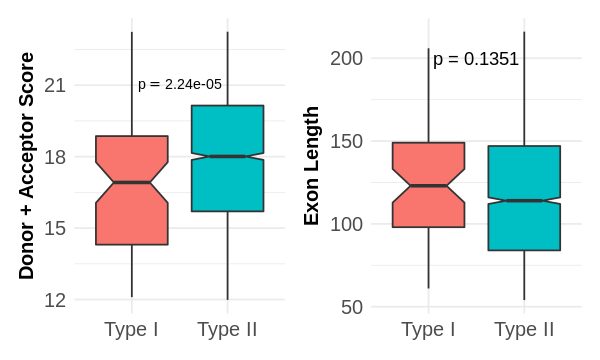

In [185]:

options(repr.plot.width=5, repr.plot.height=3)

pn1 + pn2

## Metadata

For replicability and reproducibility purposes, we also print the following metadata:

1. Checksums of **'artefacts'**, files generated during the analysis and stored in the folder directory **`data`**
2. List of environment metadata, dependencies, versions of libraries using `utils::sessionInfo()` and [`devtools::session_info()`](https://devtools.r-lib.org/reference/session_info.html)

### 1. Checksums with the sha256 algorithm

In [159]:
figure_id   = "figure5"

message("Generating sha256 checksums of the artefacts in the `..data/` directory .. ")
system(paste0("cd ../data/ && sha256sum * > ../metadata/", figure_id, "_sha256sums.txt"), intern = TRUE)
message("Done!\n")

data.table::fread(paste0("../metadata/", figure_id, "_sha256sums.txt"), header = FALSE, col.names = c("sha256sum", "file"))

Generating sha256 checksums of the artefacts in the `..data/` directory .. 


character(0)

Done!



sha256sum,file
<chr>,<chr>
5146c849c9354129590c59da5e6040a074523b4827d0975e3f5fa43737af7e9a,README.md


### 2. Libraries metadata

In [162]:
figure_id   = "figure5"

dev_session_info   <- devtools::session_info()
utils_session_info <- utils::sessionInfo()

message("Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..")
saveRDS(dev_session_info, file = paste0("../metadata/", figure_id, "_devtools_session_info.rds"))
message("Done!\n")

message("Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..")
saveRDS(utils_session_info, file = paste0("../metadata/", figure_id ,"_utils_info.rds"))
message("Done!\n")

dev_session_info$platform
dev_session_info$packages[dev_session_info$packages$attached==TRUE, ]

Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..
Done!

Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..
Done!



 setting  value                       
 version  R version 3.6.1 (2019-07-05)
 os       Ubuntu 18.04.3 LTS          
 system   x86_64, linux-gnu           
 ui       X11                         
 language en_US.UTF-8                 
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       Etc/UTC                     
 date     2020-03-03                  

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
ggplot2,ggplot2,3.2.1,3.2.1,/opt/conda/lib/R/library/ggplot2,/opt/conda/lib/R/library/ggplot2,TRUE,FALSE,2019-08-10,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
ggsci,ggsci,2.9,2.9,/opt/conda/lib/R/library/ggsci,/opt/conda/lib/R/library/ggsci,TRUE,FALSE,2018-05-14,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
latex2exp,latex2exp,0.4.0,0.4.0,/opt/conda/lib/R/library/latex2exp,/opt/conda/lib/R/library/latex2exp,TRUE,FALSE,2015-11-30,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
patchwork,patchwork,1.0.0,1.0.0,/opt/conda/lib/R/library/patchwork,/opt/conda/lib/R/library/patchwork,TRUE,FALSE,2019-12-01,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
report,report,0.1.0,0.1.0,/opt/conda/lib/R/library/report,/opt/conda/lib/R/library/report,TRUE,FALSE,2020-03-03,Github (easystats/report@dcdd283),NA,/opt/conda/lib/R/library
visdat,visdat,0.5.3,0.5.3,/opt/conda/lib/R/library/visdat,/opt/conda/lib/R/library/visdat,TRUE,FALSE,2019-02-15,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
